**Imports**

In [1]:
!pip install pyccel
!pip install numba
import numpy as np
import scipy as sp
from scipy import special as ss
import scipy.linalg as lg
import matplotlib.pyplot as pl

import time
from time import process_time


from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types



**Pure python function**

In [2]:
def analytique_pure(d,iteration,det,C0,CalphaBitha,MalphaBithaAn):
  iteration=0
  for alpha1 in range(0,d+1):
    for bita1 in range(0,d+1):
      k=C0[bita1+alpha1,alpha1]/C0[2*d,d]
      for alpha2 in range(0,d-alpha1+1):
        for bita2 in range(0,d-bita1+1):
          c=k*C0[bita2+alpha2,alpha2]
          calphabita=c*C0[d-bita1-bita2+d-alpha1-alpha2,d-alpha1-alpha2]
          CalphaBitha[iteration]=calphabita
          iteration=iteration+1
  MalphaBithaAn=((0.5*det)/C0[2*d+2,2])*CalphaBitha    
  return 0

**Pyccel accelerator**

In [3]:
@types('int','int','float','float[:,:]','float[:]')
def analytique_pyccel(d,iteration,det,C0,MalphaBithaAn):
  iteration=0
  for alpha1 in range(0,d+1):
    for bita1 in range(0,d+1):
      k=C0[bita1+alpha1,alpha1]/C0[2*d,d]
      for alpha2 in range(0,d-alpha1+1):
        for bita2 in range(0,d-bita1+1):
          c=k*C0[bita2+alpha2,alpha2]
          calphabita=c*C0[d-bita1-bita2+d-alpha1-alpha2,d-alpha1-alpha2]
          MalphaBithaAn[iteration]=((0.5*det)/C0[2*d+2,2])*calphabita
          iteration=iteration+1
           
  return 0
  

 

 

**Numba accelerator**

In [4]:
@njit
def analytique_numba(d,iteration,C0,det,MalphaBithaAn):
  iteration=0
  for alpha1 in range(0,d+1):
    for bita1 in range(0,d+1):
      k=C0[bita1+alpha1,alpha1]/C0[2*d,d]
      for alpha2 in range(0,d-alpha1+1):
        for bita2 in range(0,d-bita1+1):
          c=k*C0[bita2+alpha2,alpha2]
          calphabita=c*C0[d-bita1-bita2+d-alpha1-alpha2,d-alpha1-alpha2]
          MalphaBithaAn[iteration]=((0.5*det)/C0[2*d+2,2])*calphabita
          iteration=iteration+1
 
  return 0

**Epyccel function**

In [5]:
analytique=epyccel(analytique_pyccel)

**Inputs**

In [7]:
M=sp.array([[1,1,0],[1,2,1],[1,0,1]])          # Triangle T  
det=lg.det(M)

C0=sp.diag(sp.ones(600))
C0[:,0]=sp.ones(600)
for n in range(1,600):                        # Formule de pascal
     for m in range(1,n+1):
        C0[n,m]= C0[n-1,m-1]+C0[n-1,m] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  """


In [8]:

degremax=100
iteration=0
ind=int(C0[degremax+2,2]**2)
CalphaBitha=np.zeros(ind) 
MalphaBithaAn=np.zeros(ind)


**time for pure function**

In [258]:
temCPUpur=[]                                               
degre=[]
for i in range(1,degremax+1):
  degre.append(i)
  t1= process_time()
  analytique_pure(i,iteration,det,C0,CalphaBitha,MalphaBithaAn)
  t2= process_time()
  temCPUpur.append(t2-t1)
  



**Time for function with numba accelerator**

In [9]:
temCPUnumba=[]
degre=[]
for i in range(1,degremax+1):
  degre.append(i)
  t1n= process_time()
  analytique_numba(i,iteration,C0,det,MalphaBithaAn)  
  t2n= process_time()
  temCPUnumba.append(t2n-t1n)
'''
  star=time.time()
  analytique_numba(i,iteration,C0,CalphaBitha,MalphaBithaAn) 
  end=time.time()
  temCPUnumba2.append(end-star)
  '''


'\n  star=time.time()\n  analytique_numba(i,iteration,C0,CalphaBitha,MalphaBithaAn) \n  end=time.time()\n  temCPUnumba2.append(end-star)\n  '

In [233]:
'''
t1pyp= process_time()
MalphaBithaAn=((0.5*det)/C0[2*d+2,2])*CalphaBitha   
t2pyp= process_time()
print(t2pyp-t1pyp)
'''


0.059703155999955015


In [235]:
'''
t1pyf= process_time()
c=CalphaBitha.shape[0]
for i in range(c):
  MalphaBithaAn[i]=((0.5*det)/C0[2*d+2,2])*CalphaBitha[i]  
t2pyf= process_time()
print(t2pyf-t1pyf)
'''

19.436626731000047


**Time for function with pyccel accelerator**

In [10]:
temCPUpyccel=[]
degre=[]
for i in range(1,degremax+1):
  degre.append(i)
  t1P= process_time()
  analytique(i,iteration,det,C0,MalphaBithaAn)
  t2P= process_time()
  temCPUpyccel.append(t2P-t1P)

  




**Plot** 

**Plot pure function**

NameError: ignored

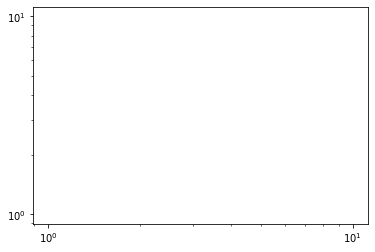

In [11]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUpur,label='Analytique pure')
pl.grid()
pl.title("Temps de calcul de matrice de masse")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=1.8*(10**(-7))
Z=cst*(Degre**4)
#pl.plot(degre,Z,'r--',label='$d^4$')
pl.legend()
pl.grid()
pl.show() 

**Plot pyccel function**

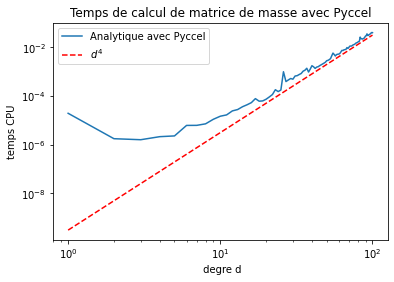

In [13]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUpyccel,label='Analytique avec Pyccel')
pl.grid()
pl.title("Temps de calcul de matrice de masse avec Pyccel")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=3.1*(10**(-10))
Z=cst*(Degre**4)
pl.plot(degre,Z,'r--',label='$d^4$')
pl.legend()
pl.grid()
pl.show() 

**Plot numba function**

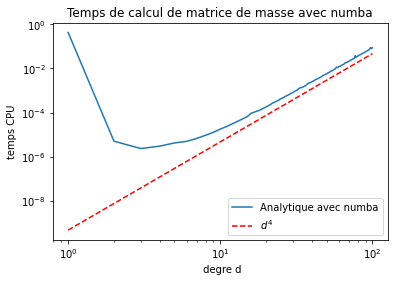

In [17]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUnumba,label='Analytique avec numba')
pl.grid()
pl.title("Temps de calcul de matrice de masse avec numba")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=4.7*(10**(-10))
Z=cst*(Degre**4)
pl.plot(degre,Z,'r--',label='$d^4$')
pl.legend()
pl.grid()
pl.show() 

**Time CPU for numba, pyccel and pure function**

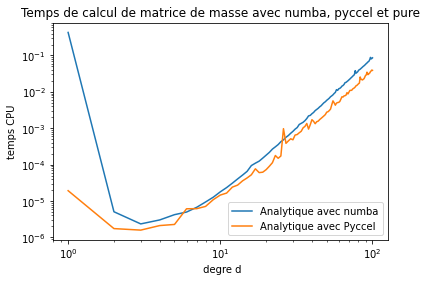

In [19]:
ax = pl.axes(xscale='log', yscale='log')
pl.plot(degre,temCPUnumba,label='Analytique avec numba')
pl.plot(degre,temCPUpyccel,label='Analytique avec Pyccel')
#pl.plot(degre,temCPUpur,label='Analytique pure')
pl.grid()
pl.title("Temps de calcul de matrice de masse avec numba, pyccel et pure")
pl.xlabel(" degre d")
pl.ylabel("temps CPU")
Degre=np.array(degre)
cst=3.1*(10**(-10))
Z=cst*(Degre**4)
#pl.plot(degre,Z,'r--',label='$d^4$')
pl.legend()
pl.grid()
pl.show() 